# Ladder-Type Three-Level: Weak Pulse with Coupling — Electromagnetically Induced Transparency

## Define the Problem

In [1]:
mb_solve_json = """
{
  "atom": {
    "decays": [
      { "channels": [[0,1]], 
        "rate": 1.0
      },
      { "channels": [[1,2]], 
        "rate": 1.0e-3
      }
    ],
    "energies": [],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "detuning": 5.0,
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 1.0e-3,
        "rabi_freq_t_args": 
          {
             "ampl": 1.0,
             "centre": 0.0,
             "fwhm": 1.0
          },
        "rabi_freq_t_func": "gaussian"
      },
      {
        "coupled_levels": [[1, 2]],
        "detuning": -5.0,
        "detuning_positive": true,
        "label": "coupling",
        "rabi_freq": 5.0,
        "rabi_freq_t_args": 
        {
          "ampl": 1.0,
          "fwhm": 0.2,
          "on": -1.0, 
          "off": 9.0
          },
        "rabi_freq_t_func": "ramp_onoff"
      }
    ],
    "num_states": 3
  },
  "t_min": -2.0,
  "t_max": 10.0,
  "t_steps": 120,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 140,
  "z_steps_inner": 10,
  "num_density_z_func": "square",
  "num_density_z_args": {
    "on": 0.0,
    "off": 1.0,
    "ampl": 1.0
  },
  "interaction_strengths": [100.0, 100.0],
  "velocity_classes": null,
  "method": "mesolve",
  "opts": {},
  "savefile": "qu/mb-solve-ladder-weak-pulse-more-atoms-some-coupling-decay" 
}
"""

In [2]:
from maxwellbloch import mb_solve
mb_solve_00 = mb_solve.MBSolve().from_json_str(mb_solve_json)

## Solve the Problem

In [4]:
%time Omegas_zt, states_zt = mb_solve_00.mbsolve(recalc=False, pbar_chunk_size=2)

 2.1%. Run time:   6.61s. Est. time left: 00:00:05:02
 4.3%. Run time:  14.93s. Est. time left: 00:00:05:33
 6.4%. Run time:  23.17s. Est. time left: 00:00:05:37
 8.6%. Run time:  31.33s. Est. time left: 00:00:05:34
10.0%. Run time:  36.79s. Est. time left: 00:00:05:31
12.1%. Run time:  45.03s. Est. time left: 00:00:05:25
14.3%. Run time:  54.11s. Est. time left: 00:00:05:24
16.4%. Run time:  63.77s. Est. time left: 00:00:05:24
18.6%. Run time:  73.15s. Est. time left: 00:00:05:20
20.0%. Run time:  79.62s. Est. time left: 00:00:05:18
22.1%. Run time:  96.00s. Est. time left: 00:00:05:37
24.3%. Run time: 117.55s. Est. time left: 00:00:06:06
26.4%. Run time: 127.39s. Est. time left: 00:00:05:54
28.6%. Run time: 137.20s. Est. time left: 00:00:05:42
30.0%. Run time: 143.47s. Est. time left: 00:00:05:34
32.1%. Run time: 151.81s. Est. time left: 00:00:05:20
34.3%. Run time: 161.47s. Est. time left: 00:00:05:09
36.4%. Run time: 183.44s. Est. time left: 00:00:05:20
38.6%. Run time: 194.14s. Es

## Plot Output

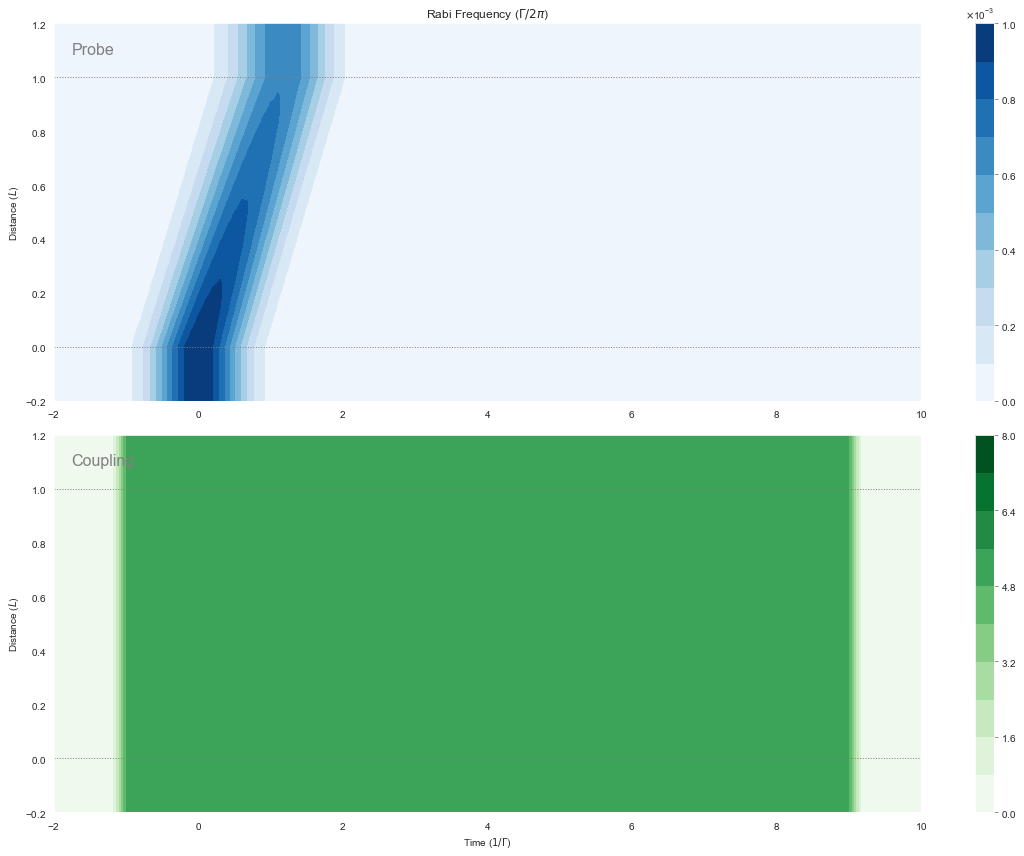

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style("dark")

import numpy as np

fig = plt.figure(1, figsize=(16, 12))

# Probe 
ax = fig.add_subplot(211)
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_ylabel('Distance ($L$)')
ax.text(0.02, 0.95, 'Probe',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes, color='grey', fontsize=16)
plt.colorbar(cf)

# Coupling
ax = fig.add_subplot(212)
cmap_range = np.linspace(0.0, 8.0, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[1]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Greens)
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
ax.text(0.02, 0.95, 'Coupling',
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes, color='grey', fontsize=16)
plt.colorbar(cf)

# Both
for ax in fig.axes:
    for y in [0.0, 1.0]:
        ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.tight_layout()
plt.savefig('images/mb-solve-ladder-weak-pulse-more-atoms-some-coupling-decay.png')